In [28]:
# 读取CSV文件
file_path = 'data/overall/btc (1).csv'  # 替换为你的CSV文件路径
df = pd.read_csv(file_path)

# 为数据集添加列名
columns = ['OpenTime', 'Open', 'High', 'Low', 'Close', 'Volume', 'CloseTime', 
           'QuoteAssetVolume', 'NumberOfTrades', 'TakerBuyBaseAssetVolume', 
           'TakerBuyQuoteAssetVolume', 'Ignore']
df.columns = columns

# 计算涨幅百分比
df['Change'] = ((df['Close'] - df['Open']) / df['Open']) * 100

# 计算HighChange
df['HighChange'] = ((df['High'] - df['Close']) / df['Close']) * 100

# 计算LowChange
df['LowChange'] = ((df['Low'] - df['Close']) / df['Close']) * 100

# 计算VolChange
# 首先，我们需要计算每个Volume与前一个Volume的差异
# 注意：对于第一行，如果没有前一个Volume，我们将其设置为0
df['VolumeChange'] = df['Volume'].diff()
# 注意：对于第一行，如果没有前一个Volume，我们将其设置为0
df.loc[df.index[0], 'VoLChange'] = 0.0000001
# 然后，我们计算这些差异的百分比
df['VolChange'] = ((df['VolumeChange'] / df['Volume'].shift(1)) * 100).fillna(0)

df = df.iloc[1:]

# 保存到新的CSV文件（如果需要）
output_file_path = 'Processed_Data/overall/BTC.csv'  # 替换为你要保存的文件路径
df.to_csv(output_file_path, index=False)


C:\Users\wangx\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 32920 (\N{CJK UNIFIED IDEOGRAPH-8098}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\wangx\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 37096 (\N{CJK UNIFIED IDEOGRAPH-90E8}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\wangx\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 27861 (\N{CJK UNIFIED IDEOGRAPH-6CD5}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\wangx\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 21017 (\N{CJK UNIFIED IDEOGRAPH-5219}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\wangx\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py

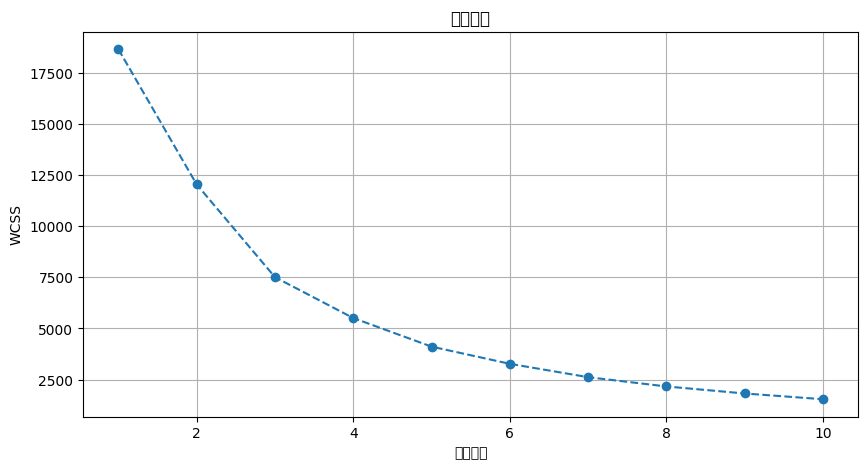

                min        max
cluster1                      
0         -0.675891   0.580715
1          0.580845  17.367225
2        -18.220147  -0.676037


C:\Users\wangx\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 32920 (\N{CJK UNIFIED IDEOGRAPH-8098}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\wangx\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 37096 (\N{CJK UNIFIED IDEOGRAPH-90E8}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\wangx\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 27861 (\N{CJK UNIFIED IDEOGRAPH-6CD5}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\wangx\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 21017 (\N{CJK UNIFIED IDEOGRAPH-5219}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\wangx\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py

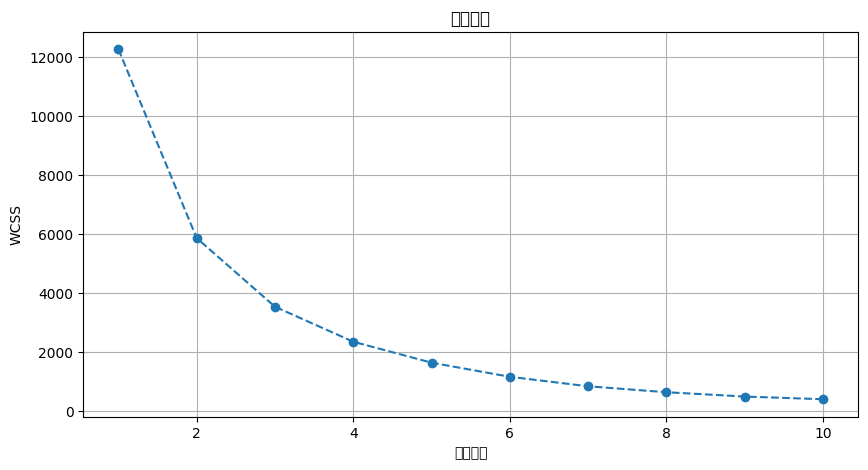

               min        max
cluster2                     
0         0.000000   1.130589
1         1.130864  22.479675


C:\Users\wangx\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 32920 (\N{CJK UNIFIED IDEOGRAPH-8098}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\wangx\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 37096 (\N{CJK UNIFIED IDEOGRAPH-90E8}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\wangx\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 27861 (\N{CJK UNIFIED IDEOGRAPH-6CD5}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\wangx\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 21017 (\N{CJK UNIFIED IDEOGRAPH-5219}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\wangx\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py

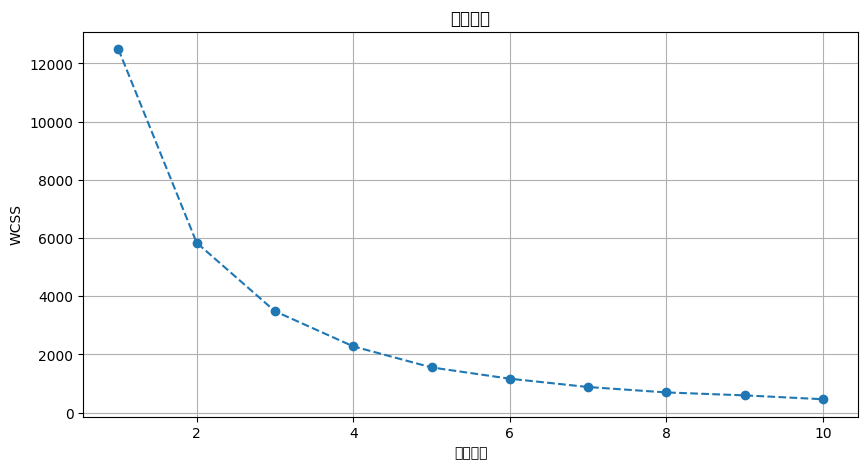

                min       max
cluster3                     
0        -21.997191 -1.101326
1         -1.101035  0.000000


ValueError: Input X contains infinity or a value too large for dtype('float64').

In [30]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 读取CSV文件
file_path = 'Processed_Data/overall/BTC.csv'  # 替换为你的CSV文件路径
df = pd.read_csv(file_path)

df = df.iloc[3:]

# 'Change', 'HighChange', 'LowChange', 'VolChange'

# 使用KMeans的肘部法则来确定最佳的簇数
wcss1 = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df[['Change']])
    wcss1.append(kmeans.inertia_)


# 绘制肘部图表
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss1, marker='o', linestyle='--')
plt.title('肘部法则')
plt.xlabel('簇的数量')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

# 根据肘部图表选择最佳的簇数，然后进行聚类
optimal_clusters = 3  # 假设我们通过肘部图表决定最佳的簇数是3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
df['cluster1'] = kmeans.fit_predict(df[['Change']])

# 找到每个簇的涨幅范围
cluster_ranges1 = df.groupby('cluster1')['Change'].agg(['min', 'max'])

# 打印每个簇的涨幅范围
print(cluster_ranges1)

# 使用KMeans的肘部法则来确定最佳的簇数
wcss2 = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df[['HighChange']])
    wcss2.append(kmeans.inertia_)


# 绘制肘部图表
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss2, marker='o', linestyle='--')
plt.title('肘部法则')
plt.xlabel('簇的数量')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

# 根据肘部图表选择最佳的簇数，然后进行聚类
optimal_clusters = 2  # 假设我们通过肘部图表决定最佳的簇数是3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
df['cluster2'] = kmeans.fit_predict(df[['HighChange']])

# 找到每个簇的涨幅范围
cluster_ranges2 = df.groupby('cluster2')['HighChange'].agg(['min', 'max'])

# 打印每个簇的涨幅范围
print(cluster_ranges2)

# 使用KMeans的肘部法则来确定最佳的簇数
wcss3 = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df[['LowChange']])
    wcss3.append(kmeans.inertia_)


# 绘制肘部图表
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss3, marker='o', linestyle='--')
plt.title('肘部法则')
plt.xlabel('簇的数量')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

# 根据肘部图表选择最佳的簇数，然后进行聚类
optimal_clusters = 2  # 假设我们通过肘部图表决定最佳的簇数是3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
df['cluster3'] = kmeans.fit_predict(df[['LowChange']])

# 找到每个簇的涨幅范围
cluster_ranges3 = df.groupby('cluster3')['LowChange'].agg(['min', 'max'])

# 打印每个簇的涨幅范围
print(cluster_ranges3)

# 使用KMeans的肘部法则来确定最佳的簇数
wcss4 = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df[['VolChange']])
    wcss4.append(kmeans.inertia_)


# 绘制肘部图表
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss4, marker='o', linestyle='--')
plt.title('肘部法则')
plt.xlabel('簇的数量')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

# 根据肘部图表选择最佳的簇数，然后进行聚类
optimal_clusters = 3  # 假设我们通过肘部图表决定最佳的簇数是3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
df['cluster4'] = kmeans.fit_predict(df[['VolChange']])

# 找到每个簇的涨幅范围
cluster_ranges4 = df.groupby('cluster4')['VolChange'].agg(['min', 'max'])

# 打印每个簇的涨幅范围
print(cluster_ranges4)

# 保存到新的CSV文件（如果需要）
output_file_path = 'Processed_Data/overall/BTC_clustered.csv'  # 替换为你要保存的文件路径
df.to_csv(output_file_path, index=False)


C:\Users\wangx\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 32920 (\N{CJK UNIFIED IDEOGRAPH-8098}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\wangx\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 37096 (\N{CJK UNIFIED IDEOGRAPH-90E8}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\wangx\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 27861 (\N{CJK UNIFIED IDEOGRAPH-6CD5}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\wangx\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 21017 (\N{CJK UNIFIED IDEOGRAPH-5219}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\wangx\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py

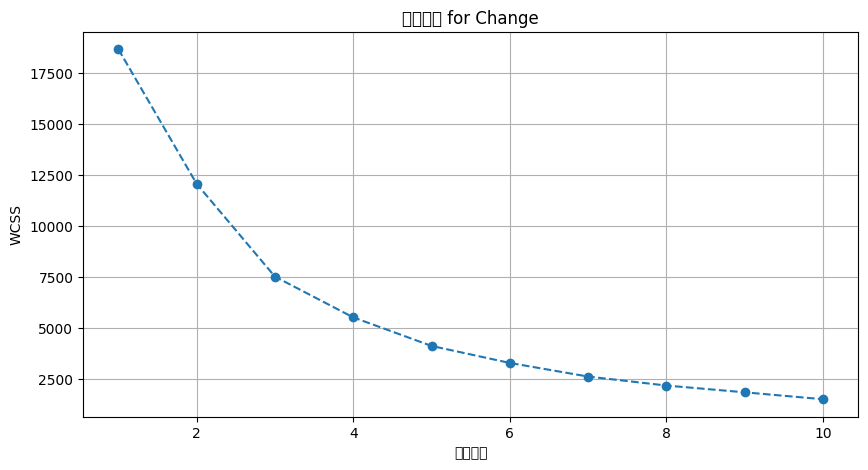

C:\Users\wangx\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 32920 (\N{CJK UNIFIED IDEOGRAPH-8098}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\wangx\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 37096 (\N{CJK UNIFIED IDEOGRAPH-90E8}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\wangx\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 27861 (\N{CJK UNIFIED IDEOGRAPH-6CD5}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\wangx\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 21017 (\N{CJK UNIFIED IDEOGRAPH-5219}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\wangx\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py

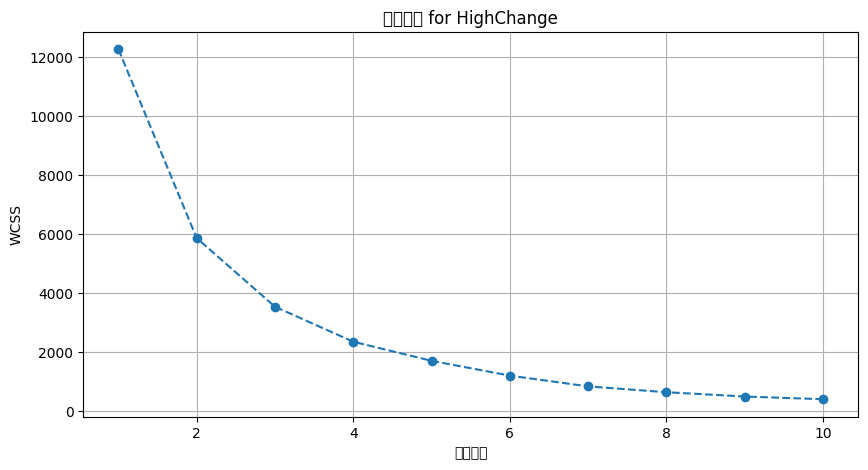

C:\Users\wangx\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 32920 (\N{CJK UNIFIED IDEOGRAPH-8098}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\wangx\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 37096 (\N{CJK UNIFIED IDEOGRAPH-90E8}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\wangx\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 27861 (\N{CJK UNIFIED IDEOGRAPH-6CD5}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\wangx\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 21017 (\N{CJK UNIFIED IDEOGRAPH-5219}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\wangx\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py

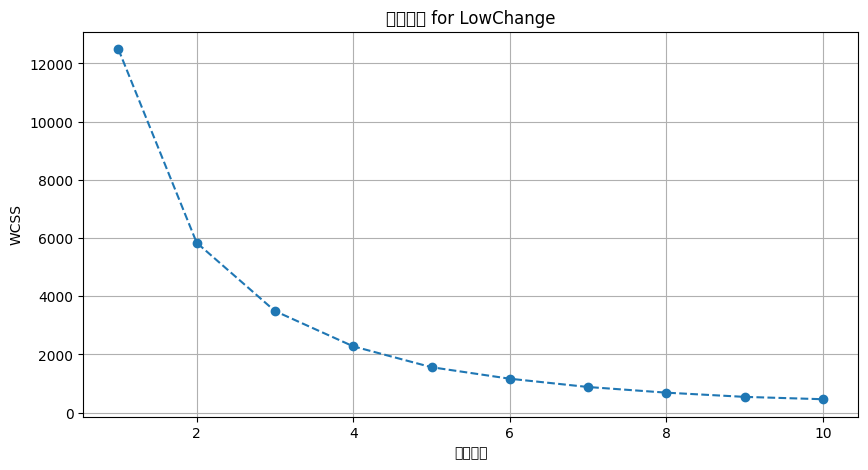

ValueError: Input X contains infinity or a value too large for dtype('float64').

In [16]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 读取CSV文件
file_path = 'Processed_Data/overall/BTC.csv'  # 替换为你的CSV文件路径
df = pd.read_csv(file_path)

# 确保您已经有了以下特征列
# 'Change', 'HighChange', 'LowChange', 'VolChange'
features = ['Change', 'HighChange', 'LowChange', 'VolChange']

# 初始化一个字典来存储每个特征的WCSS值
wcss_dict = {}

# 为每个特征应用KMeans算法并计算WCSS
for feature in features:
    # 使用KMeans的肘部法则来确定最佳的簇数
    wcss_feature = []
    for i in range(1, 11):
        kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
        kmeans.fit(df[[feature]])
        wcss_feature.append(kmeans.inertia_)

    # 绘制肘部图表
    plt.figure(figsize=(10, 5))
    plt.plot(range(1, 11), wcss_feature, marker='o', linestyle='--')
    plt.title(f'肘部法则 for {feature}')
    plt.xlabel('簇的数量')
    plt.ylabel('WCSS')
    plt.grid(True)
    plt.show()



In [66]:
import pandas as pd
import numpy as np

# 读取CSV文件
file_path = 'Processed_Data/overall/ETH_clustered.csv'  # 替换为你的CSV文件路径
df = pd.read_csv(file_path)

# 初始化一个字典来存储相同Cluster组的第六个Change数据
cluster_groups = {}

# 遍历数据集，每组取五个数据点
for i in range(0, len(df) - 5):  # 减去5确保至少有六个数据点用于最后一组
    # 前五个数据来自Cluster列
    cluster_group = tuple(df['cluster'].iloc[i:i+5])
    
    # 第六个数据来自Change列
    sixth_data_change = df['Change'].iloc[i+5]
    
    # 检查这个Cluster组是否已经在字典中
    if cluster_group in cluster_groups:
        # 如果在，将第六个Change数据加入到对应的列表中
        cluster_groups[cluster_group]['changes'].append(sixth_data_change)
        if sixth_data_change > 0:
            cluster_groups[cluster_group]['positive_count'] += 1
    else:
        # 如果不在，创建一个新的键，并将第六个Change数据作为一个列表的元素
        cluster_groups[cluster_group] = {'changes': [sixth_data_change], 'positive_count': 0}
        if sixth_data_change > 0:
            cluster_groups[cluster_group]['positive_count'] = 1

# 计算每个Cluster组第六个Change数据的平均值和正数百分比
results = {}
for cluster_group, data in cluster_groups.items():
    average_change = np.mean(data['changes'])
    positive_percentage = (data['positive_count'] / len(data['changes'])) * 100
    results[cluster_group] = (average_change, positive_percentage, len(data['changes']))

# 过滤count<10的集群组，并按照Positive Change Percentage从大到小排列
filtered_results = {k: v for k, v in results.items() if v[2] >= 10}
sorted_results = sorted(filtered_results.items(), key=lambda x: x[1][1], reverse=True)

# 打印每个Cluster组及其第六个Change数据的平均值、正数百分比和数据点数量
for cluster_group, (average_change, positive_percentage, data_count) in sorted_results:
    print(f"Cluster Group: {cluster_group}, Average Sixth Data Change: {average_change:.2f}, Positive Change Percentage: {positive_percentage:.2f}%, Data Count: {data_count}")


Cluster Group: (2, 4, 2, 2, 0), Average Sixth Data Change: 0.53, Positive Change Percentage: 90.00%, Data Count: 10
Cluster Group: (4, 4, 4, 4, 1), Average Sixth Data Change: 0.27, Positive Change Percentage: 81.82%, Data Count: 22
Cluster Group: (4, 0, 2, 2, 2), Average Sixth Data Change: 0.26, Positive Change Percentage: 78.57%, Data Count: 14
Cluster Group: (2, 1, 0, 0, 2), Average Sixth Data Change: 0.35, Positive Change Percentage: 75.00%, Data Count: 12
Cluster Group: (2, 2, 0, 2, 0), Average Sixth Data Change: 0.09, Positive Change Percentage: 75.00%, Data Count: 24
Cluster Group: (0, 0, 4, 2, 4), Average Sixth Data Change: 0.27, Positive Change Percentage: 73.91%, Data Count: 23
Cluster Group: (0, 2, 0, 2, 0), Average Sixth Data Change: 0.45, Positive Change Percentage: 73.68%, Data Count: 19
Cluster Group: (2, 0, 0, 4, 2), Average Sixth Data Change: 0.10, Positive Change Percentage: 73.33%, Data Count: 15
Cluster Group: (4, 2, 2, 0, 4), Average Sixth Data Change: 0.30, Positiv